# Импортируем все необходимые модули

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import math

# 1.1. Напишите функции read_gff и read_bed6 для чтения соответствующих форматов. Они должны возвращать датафреймы как в примере (картинка Example1), но имена колонок можно сделать любыми.

In [3]:
def read_bed6(input_file):
    resbed = pd.read_csv(input_file, sep='\t', header=None)
    resbedheader = ['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand']
    resbed.columns = resbedheader[:len(resbed.columns)]
    return resbed

In [4]:
bedfile = read_bed6('alignment.bed')
bedfile.head()

,chrom,chromStart,chromEnd,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-


In [6]:
def read_gff(input_file):
    resgff = pd.read_csv(input_file, header=None, skiprows=1, sep = '\t')
    resgffheader = ['chrom', 'source', 'type', 'chromStart', 'chromEnd','score', 'strand', 'phase', 'attributes']
    resgff.columns = resgffheader[:len(resgff.columns)]
    return resgff

In [7]:
gfffile = read_gff("rrna_annotation.gff")
gfffile.head()

,chrom,source,type,chromStart,chromEnd,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.0,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.0,-,.,Name=23S_rRNA;product=23S ribosomal RNA


# 1.2. Колонка с атрибутами несёт слишком много избыточной информации и ей не удобно пользоваться, оставьте в ней только данные о типе рРНК одной короткой строкой (16S, 23S, 5S).

In [8]:
gfffile['attributes'] = gfffile['attributes'].str.split(';|=| ', expand = True)[3]

In [9]:
gfffile.head()

,chrom,source,type,chromStart,chromEnd,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.0,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.0,-,.,23S


# 1.3. Сделайте таблицу, где для каждой хромосомы (на самом деле это не хромосомы, а референсные геномы) показано количество рРНК каждого типа. Постройте barplot, отображающий эти данные.

In [10]:
datasub = gfffile.groupby('chrom')['attributes'].value_counts().unstack()

In [11]:
datasub.head()

attributes,16S,23S,5S
chrom,,,
Reference_1,2.0,2.0,2.0
Reference_10,5.0,5.0,NaN
Reference_11,2.0,2.0,2.0
Reference_12,2.0,2.0,2.0
Reference_13,4.0,4.0,4.0


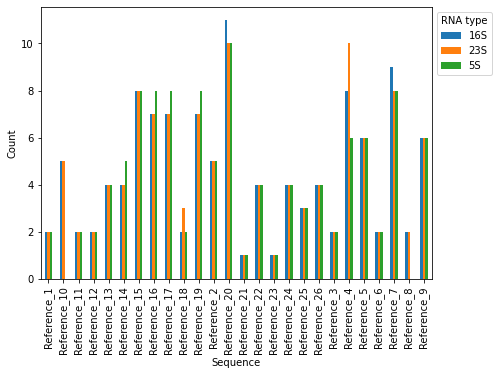

In [12]:
ax = datasub.plot(kind='bar', figsize=(7, 5), xlabel='Sequence', ylabel='Count', rot=0)
ax.legend(title='RNA type', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=90);

# 1.4. Мы хотим узнать сколько рРНК в процессе сборки успешно собралось. Для этого надо сохранить только записи об рРНК, интервал которой перекрывался с интервалом контига в выравнивании, это означает, что этот ген есть в сборке. Выведите таблицу, содержащую исходные записи об рРНК полностью вошедших в сборку (не фрагментом), а также запись о контиге, в который эта РНК попала. Обратите внимание, что в один контиг может попасть несколько рРНК.

In [13]:
mrgd = gfffile.merge(bedfile, on = 'chrom')
mrgd[(mrgd['chromStart_x'] > mrgd['chromStart_y']) & (mrgd['chromEnd_x'] < mrgd['chromEnd_y'])]
mrgd.head()

,chrom,source,type,chromStart_x,chromEnd_x,score_x,strand_x,phase,attributes,chromStart_y,chromEnd_y,name,score_y,strand_y
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,67964,68037,NODE_19846_length_73_cov_334.777778,0,+
1,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,512498,512739,NODE_13330_length_244_cov_1.195767,4,-
2,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,1940123,1940316,NODE_15898_length_227_cov_0.959302,0,-
3,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,2959910,2960140,NODE_14270_length_237_cov_1.565934,60,+
4,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,3422064,3422561,NODE_4494_length_558_cov_1.447316,60,-


# Для визуализации данных дифференциальной экспрессии генов, можно использовать специальный тип графика - volcano plot. По оси X на графике отложен logFC (Logarithmic Fold Change) - во сколько раз изменилась экспрессия гена в степенях двойки (logFC=-8 - экспрессия гена изменилась в 2^-8 раз). По оси Y откладывается уровень значимости данных изменений в виде отрицательного десятичного логарифма p-value (с поправкой на множественное сравнение).

In [14]:
diff_expr = pd.read_table('diffexpr_data.tsv.gz')
diff_expr.head()

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,0.659033,1.0,-0.0
1,CELA2A,8.691414,0.582390,1.0,-0.0
2,CLPS,8.054078,0.651733,1.0,-0.0
3,MPO,7.817773,0.448334,1.0,-0.0
4,AMY2A,7.285231,0.632441,1.0,-0.0


In [15]:
conditions = [
    (diff_expr['logFC'] >= 0) & (diff_expr['log_pval'] >= 1.3),
    (diff_expr['logFC'] < 0) & (diff_expr['log_pval'] >= 1.3),
    (diff_expr['logFC'] >= 0) & (diff_expr['log_pval'] < 1.3),
    (diff_expr['logFC'] < 0) & (diff_expr['log_pval'] < 1.3)
    ]
values = ['Significantly upregulated', 'Significantly downregulated', 'Nonsignificantly upregulated', 'Nonsignificantly downregulated']
colors = {'Significantly upregulated':'orange', 'Significantly downregulated':'blue', 'Nonsignificantly upregulated':'red', 'Nonsignificatly downregulated':'green'}

diff_expr['cat'] = np.select(conditions, values)

In [16]:
# We evaluate which limits to choose for our plot
print(min(diff_expr['logFC']), max(diff_expr['logFC']))
# As our minimum value is too close to 11, we set 12 as min and max value

-10.661092815248146 10.092524279930334


In [17]:
# Get 2 genes with maximum log_pval
max_log_p = diff_expr.query('log_pval > 1.3').iloc[0:2]
# Get 2 genes with minimum log_pval
min_log_p = diff_expr.query('log_pval > 1.3')[::-1].iloc[0:2]

Text(-9.196480736032145, 14.171498363731793, 'MUC7')

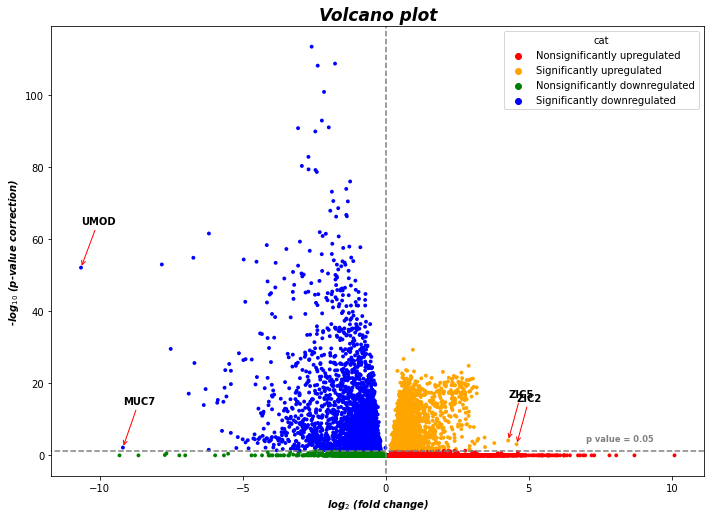

In [18]:
# Plotting with Seaborn package
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x="logFC", y="log_pval", data=diff_expr, s=15, 
                hue = 'cat', alpha = 1, palette = ['red','orange','green','blue'], 
                legend='full', linewidth=0)
plt.axvline(0, 10, 0, linestyle = '--', color = 'gray', label = 'cat')
plt.axhline(1.3, 10, 0, linestyle = '--', color = 'gray')
plt.title("Volcano plot", weight='bold', style = 'italic', size = 17)
plt.xlabel("log$_2$ (fold change)", weight='bold', style = 'italic')
plt.ylabel("-log$_{10}$ (p-value correction)", style = 'italic', weight='bold')
plt.text(7, 4, 'p value = 0.05', c='grey', size='small', weight='bold')

plt.annotate(max_log_p.iloc[0][0], (max_log_p.iloc[0][1], max_log_p.iloc[0][4]), weight='bold',
             xytext=(max_log_p.iloc[0][1], max_log_p.iloc[0][4] + 12), 
             arrowprops=dict(arrowstyle='->', color = 'red'))
plt.annotate(max_log_p.iloc[1][0], (max_log_p.iloc[1][1], max_log_p.iloc[1][4]), weight='bold',
             xytext=(max_log_p.iloc[1][1], max_log_p.iloc[1][4] + 12), 
             arrowprops=dict(arrowstyle='->', color = 'red'))
plt.annotate(min_log_p.iloc[0][0], (min_log_p.iloc[0][1], min_log_p.iloc[0][4]), weight='bold',
             xytext=(min_log_p.iloc[0][1], min_log_p.iloc[0][4] + 12), 
             arrowprops=dict(arrowstyle='->', color = 'red'))
plt.annotate(min_log_p.iloc[1][0], (min_log_p.iloc[1][1], min_log_p.iloc[1][4]), weight='bold',
             xytext=(min_log_p.iloc[1][1], min_log_p.iloc[1][4] + 12), 
             arrowprops=dict(arrowstyle='->', color = 'red'))

